In [ ]:
from os import path
import os
import time

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from konlpy.tag import Okt
from collections import Counter

from wordcloud import WordCloud, STOPWORDS

# ─── 1. 환경 세팅 ──────────────────────────────────────────
# 크롬 드라이버 경로 (실제 있는 위치로 수정)
CHROME_DRIVER = r"C:\Users\User\.cache\selenium\chromedriver\win64\136.0.7103.113\chromedriver.exe"
# 꽃 실루엣 마스크 이미지 경로
MASK_PATH     = r"C:\Users\User\Desktop\png-transparent-stencil-flower-silhouette-flower-leaf-logo-monochrome-thumbnail.png"
# 워드클라우드 저장 경로
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
OUTPUT_FILE   = path.join(d, "flower_wordcloud.png")

# ─── 2. Selenium으로 제목 스크래핑 ─────────────────────────
service = Service(CHROME_DRIVER)
driver  = webdriver.Chrome(service=service)
driver.get("https://www.chosun.com/")
time.sleep(2)  # 페이지 로딩 대기

# CSS 선택자 확인: 조선일보 메인의 헤드라인 링크
elements = driver.find_elements(By.CSS_SELECTOR, "a.story-card__headline")
title_list = [e.text.strip() for e in elements if e.text.strip()]
driver.quit()

# ─── 3. Okt로 명사 추출 & 빈도수 세기 ────────────────────
okt    = Okt()
nouns  = []
for title in title_list:
    nouns += okt.nouns(title)

# 1글자 명사 제외
filtered = [n for n in nouns if len(n) > 1]
counted  = Counter(filtered)

# ─── 4. 마스크 이미지 로드 ───────────────────────────────
mask = np.array(Image.open(MASK_PATH))

# ─── 5. WordCloud 생성 ─────────────────────────────────
stopwords = set(STOPWORDS)
# 필요 시 한국어 불용어 추가:
# stopwords.update(["코로나", "관련", ...])

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\malgun.ttf",  # 한글 폰트
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords,
    contour_width=3,
    contour_color="steelblue"
).generate_from_frequencies(counted)

# ─── 6. 파일로 저장 & 화면에 표시 ───────────────────────
wc.to_file(OUTPUT_FILE)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


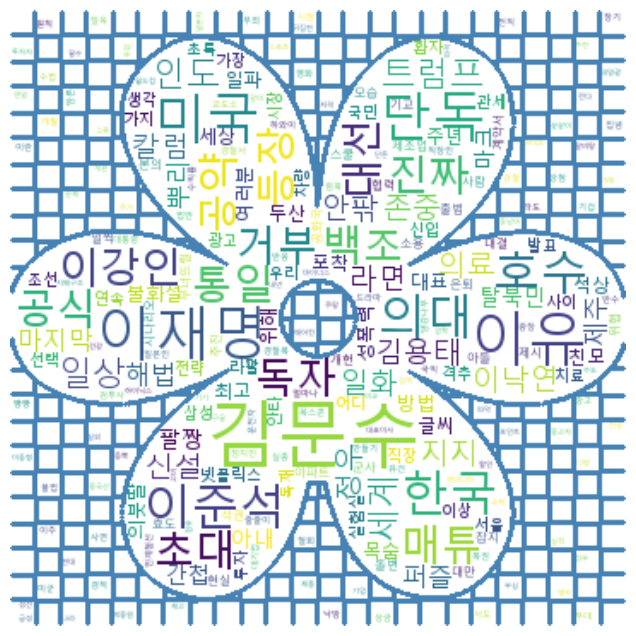

In [5]:

from os import path
import os
import time

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

from konlpy.tag import Okt
from collections import Counter

from wordcloud import WordCloud, STOPWORDS

# ─── 1. 환경 세팅 ──────────────────────────────────────────
# 크롬 드라이버 경로 (실제 있는 위치로 수정)
CHROME_DRIVER = r"C:\Users\User\.cache\selenium\chromedriver\win64\136.0.7103.113\chromedriver.exe"
# 꽃 실루엣 마스크 이미지 경로
MASK_PATH     = r"C:\Users\User\Desktop\png-transparent-stencil-flower-silhouette-flower-leaf-logo-monochrome-thumbnail.png"
# 워드클라우드 저장 경로
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
OUTPUT_FILE   = path.join(d, "flower_wordcloud.png")

# ─── 2. Selenium으로 제목 스크래핑 ─────────────────────────
service = Service(CHROME_DRIVER)
driver  = webdriver.Chrome(service=service)
driver.get("https://www.chosun.com/")
time.sleep(2)  # 페이지 로딩 대기

# CSS 선택자 확인: 조선일보 메인의 헤드라인 링크
elements = driver.find_elements(By.CSS_SELECTOR, "a.story-card__headline")
title_list = [e.text.strip() for e in elements if e.text.strip()]
driver.quit()

# ─── 3. Okt로 명사 추출 & 빈도수 세기 ────────────────────
okt   = Okt()
nouns = []
for title in title_list:
    nouns += okt.nouns(title)

# 1글자 명사 제외
filtered = [n for n in nouns if len(n) > 1]
counted  = Counter(filtered)

# ─── 4. 마스크 이미지 로드 (그레이스케일 변환) ────────────
mask_img = Image.open(MASK_PATH).convert("L")  # L 모드: 그레이스케일
mask     = np.array(mask_img)

# ─── 5. WordCloud 생성 ───────────────────────────────────
stopwords = set(STOPWORDS)
# 필요 시 한국어 불용어 추가:
# stopwords.update(["코로나", "관련", ...])

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\malgun.ttf",  # 한글 폰트
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=stopwords,
    contour_width=3,
    contour_color="steelblue"
).generate_from_frequencies(counted)

# ─── 6. 파일로 저장 & 화면에 표시 ───────────────────────
wc.to_file(OUTPUT_FILE)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
